In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
os.getcwd()

'/home/sam/code/cohere/cohere-reasoning-v5/gsm8k'

In [3]:
gsm_symbolic_completions_off = pd.read_csv("datasets/gsm-symbolic-experiment/gsm8k_completions_off_policy.csv")
gsm_symbolic_completions_on = pd.read_csv("datasets/gsm-symbolic-experiment/gsm8k_completions_on_policy.csv")
gsm_symbolic_straight_shot = pd.read_csv("datasets/gsm-symbolic-experiment/gsm8k_straight_shot_solutions.csv")
print(f"GSM Symbolic Shapes: {gsm_symbolic_completions_off.shape}, {gsm_symbolic_completions_on.shape}, {gsm_symbolic_straight_shot.shape}")


gsm_symbolic_matched_completions_off = pd.read_csv("datasets/gsm-symbolic-matched-from-gsm8k-experiment/gsm8k_completions_off_policy.csv")
gsm_symbolic_matched_completions_on = pd.read_csv("datasets/gsm-symbolic-matched-from-gsm8k-experiment/gsm8k_completions_on_policy.csv")
gsm_symbolic_matched_straight_shot = pd.read_csv("datasets/gsm-symbolic-matched-from-gsm8k-experiment/gsm8k_straight_shot_solutions.csv")
print(f"GSM Symbolic Matched Shapes: {gsm_symbolic_matched_completions_off.shape}, {gsm_symbolic_matched_completions_on.shape}, {gsm_symbolic_matched_straight_shot.shape}")

gsm_completions_off = pd.read_csv("datasets/gsm8k-experiment/gsm8k_completions_off_policy.csv")
gsm_completions_on = pd.read_csv("datasets/gsm8k-experiment/gsm8k_completions_on_policy.csv")
gsm_straight_shot = pd.read_csv("datasets/gsm8k-experiment/gsm8k_straight_shot_solutions.csv")
print(f"GSM Shapes: {gsm_completions_off.shape}, {gsm_completions_on.shape}, {gsm_straight_shot.shape}")

math_completions_off = pd.read_csv("datasets/math-experiment/gsm8k_completions_off_policy.csv")
math_completions_on = pd.read_csv("datasets/math-experiment/gsm8k_completions_on_policy.csv")
math_straight_shot = pd.read_csv("datasets/math-experiment/gsm8k_straight_shot_solutions.csv")
print(f"Math Shapes: {math_completions_off.shape}, {math_completions_on.shape}, {math_straight_shot.shape}")


GSM Symbolic Shapes: (600, 11), (600, 11), (600, 7)
GSM Symbolic Matched Shapes: (600, 11), (600, 11), (600, 7)
GSM Shapes: (7914, 11), (7914, 11), (7914, 7)
Math Shapes: (3000, 11), (3000, 11), (2938, 7)


In [4]:
print(list(gsm_symbolic_straight_shot.columns))
print(list(gsm_symbolic_completions_off.columns))
print(list(gsm_symbolic_completions_on.columns))

['problem_id', 'problem', 'answer', 'solution_model', 'solution_model_provider', 'solution', 'solution_verified']
['problem_id', 'problem', 'answer', 'stub', 'stub_and_perturb_model', 'stub_and_perturb_model_provider', 'completion_model', 'completion_model_provider', 'perturbed_stub_lm', 'perturbed_stub_lm_completion', 'perturbed_stub_lm_solution_verified']
['problem_id', 'problem', 'answer', 'stub', 'perturb_model', 'perturb_model_provider', 'completion_model', 'completion_model_provider', 'perturbed_stub_lm', 'perturbed_stub_lm_completion', 'perturbed_stub_lm_solution_verified']


In [5]:
dfs = [
    gsm_symbolic_completions_off, gsm_symbolic_completions_on, gsm_symbolic_straight_shot, 
    gsm_symbolic_matched_completions_off, gsm_symbolic_matched_completions_on, gsm_symbolic_matched_straight_shot,
    gsm_completions_off, gsm_completions_on, gsm_straight_shot,
    math_completions_off, math_completions_on, math_straight_shot
]


In [6]:
# Calculate percentage of verified solutions per model
def get_rates(df):
    model_col = "solution_model" if "solution_model" in df.columns else "completion_model"
    verified_col = "solution_verified" if "solution_verified" in df.columns else "perturbed_stub_lm_solution_verified"
    return df.groupby(model_col)[verified_col].mean().to_dict()

In [7]:
list(get_rates(gsm_symbolic_completions_off).keys())

['command-r7b-12-2024',
 'google/gemma-2-27b-it',
 'meta-llama/llama-3.3-70b-instruct',
 'mistralai/mistral-nemo',
 'qwen/qwen-2.5-72b-instruct',
 'qwen/qwq-32b-preview']

In [18]:
lookup = {}
lookup["gsm8k"] = {
    "direct": get_rates(gsm_straight_shot),
    "on": get_rates(gsm_completions_on),
    "off": get_rates(gsm_completions_off),
}
lookup["math"] = {
    "direct": get_rates(math_straight_shot),
    "on": get_rates(math_completions_on),
    "off": get_rates(math_completions_off),
}
lookup["gsm_symbolic"] = {
    "direct": get_rates(gsm_symbolic_straight_shot),
    "on": get_rates(gsm_symbolic_completions_on),
    "off": get_rates(gsm_symbolic_completions_off),
}
lookup["gsm_symbolic_matched"] = {
    "direct": get_rates(gsm_symbolic_matched_straight_shot),
    "on": get_rates(gsm_symbolic_matched_completions_on),
    "off": get_rates(gsm_symbolic_matched_completions_off),
}

lookup
# SAM EDIT: ADD IN R1 POST-HOC!

{'gsm8k': {'direct': {'command-r7b-12-2024': 0.8862774829416225,
   'google/gemma-2-27b-it': 0.9075056861258529,
   'meta-llama/llama-3.3-70b-instruct': 0.9643669446550417,
   'mistralai/mistral-nemo': 0.8771796815769523,
   'qwen/qwen-2.5-72b-instruct': 0.9514783927217589,
   'qwen/qwq-32b-preview': 0.9522365428354814},
  'on': {'command-r7b-12-2024': 0.10841546626231995,
   'google/gemma-2-27b-it': 0.12054586808188021,
   'meta-llama/llama-3.3-70b-instruct': 0.4313874147081122,
   'mistralai/mistral-nemo': 0.0932524639878696,
   'qwen/qwen-2.5-72b-instruct': 0.4184988627748294,
   'qwen/qwq-32b-preview': 0.6641394996209249},
  'off': {'command-r7b-12-2024': 0.08794541319181198,
   'google/gemma-2-27b-it': 0.16300227445034116,
   'meta-llama/llama-3.3-70b-instruct': 0.46398786959818045,
   'mistralai/mistral-nemo': 0.09249431387414708,
   'qwen/qwen-2.5-72b-instruct': 0.3904473085670963,
   'qwen/qwq-32b-preview': 0.2395754359363154}},
 'math': {'direct': {'command-r7b-12-2024': 0.59,

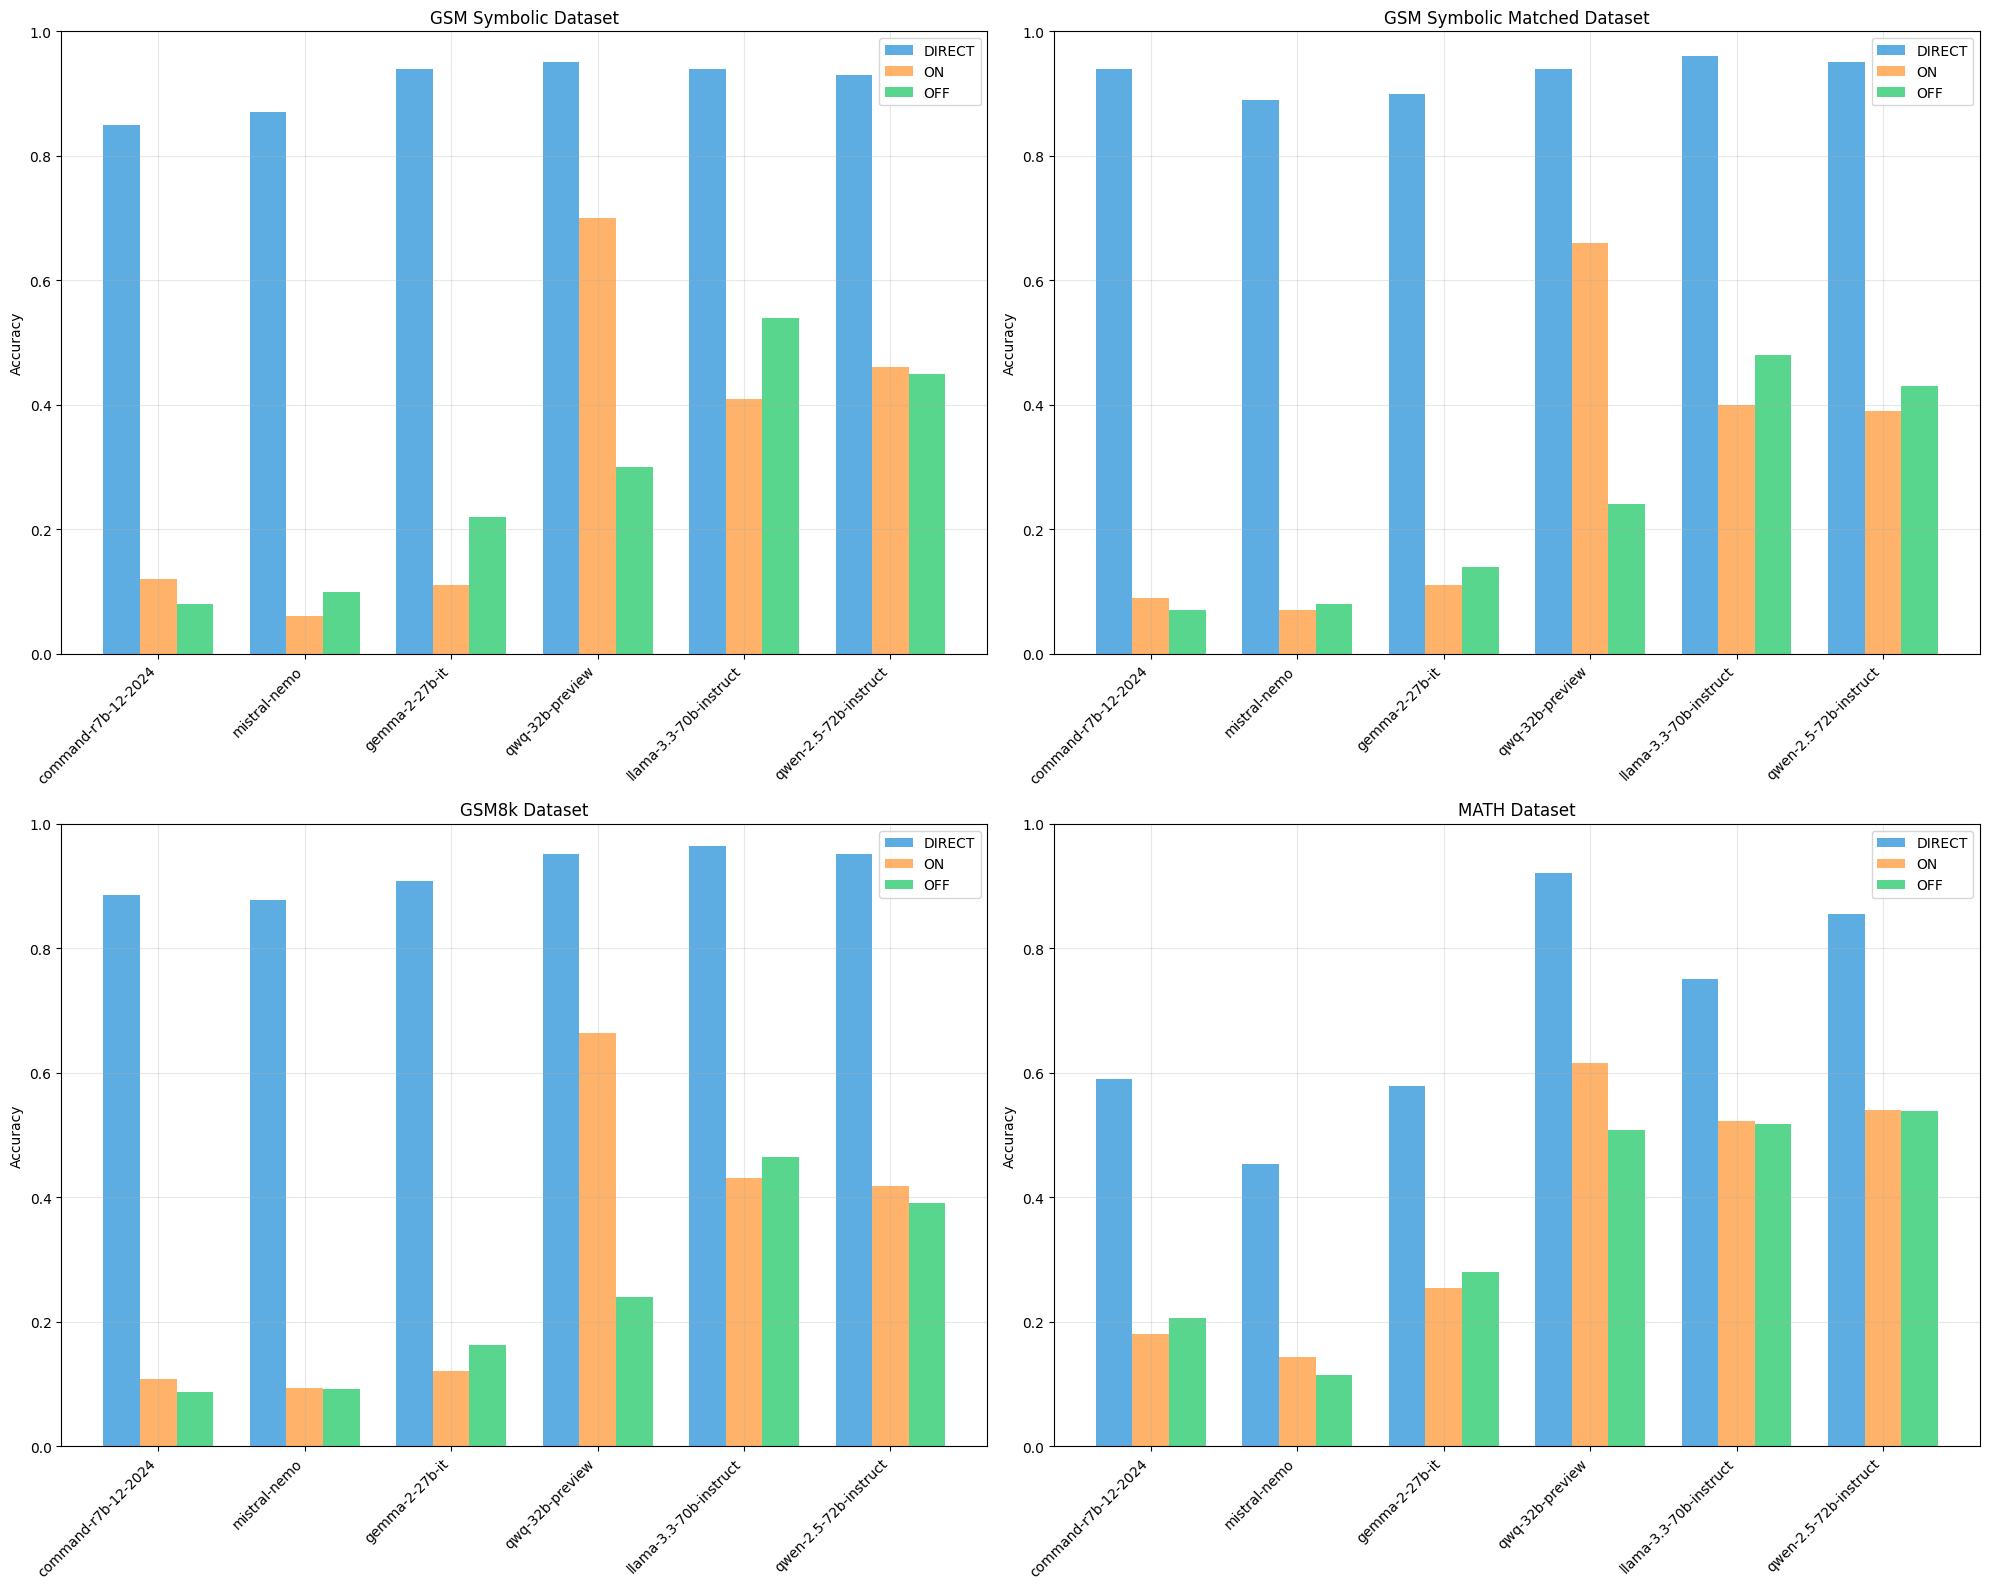

In [9]:
# Create the visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

# Colors for the three scenarios
colors = ['#3498db', '#ff9f43', '#2ecc71']
bar_width = 0.25

datasets = ['gsm_symbolic', 'gsm_symbolic_matched', 'gsm8k', 'math']
scenarios = ['direct', 'on', 'off']

models = [
    'command-r7b-12-2024',
    'mistralai/mistral-nemo',
    'google/gemma-2-27b-it',
    'qwen/qwq-32b-preview',
    'meta-llama/llama-3.3-70b-instruct',
    'qwen/qwen-2.5-72b-instruct',
]

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    x = np.arange(len(models))
    
    # Plot bars for each scenario
    for i, (scenario, color) in enumerate(zip(scenarios, colors)):
        values = [lookup[dataset][scenario][model] for model in models]
        ax.bar(x + i*bar_width, values, bar_width, label=scenario.upper(), color=color, alpha=0.8)
    
    # Customize the plot
    ax.set_ylabel('Accuracy')
    title_lookup = {
        "gsm_symbolic": "GSM Symbolic",
        "gsm_symbolic_matched": "GSM Symbolic Matched",
        "gsm8k": "GSM8k",
        "math": "MATH"
    }
    ax.set_title(f'{title_lookup[dataset]} Dataset')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels([m.split('/')[-1] for m in models], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.0)  # Changed from 0.5 to 0

plt.tight_layout()
plt.show()

# 02/12: Trying to shove R1 results in teh above again

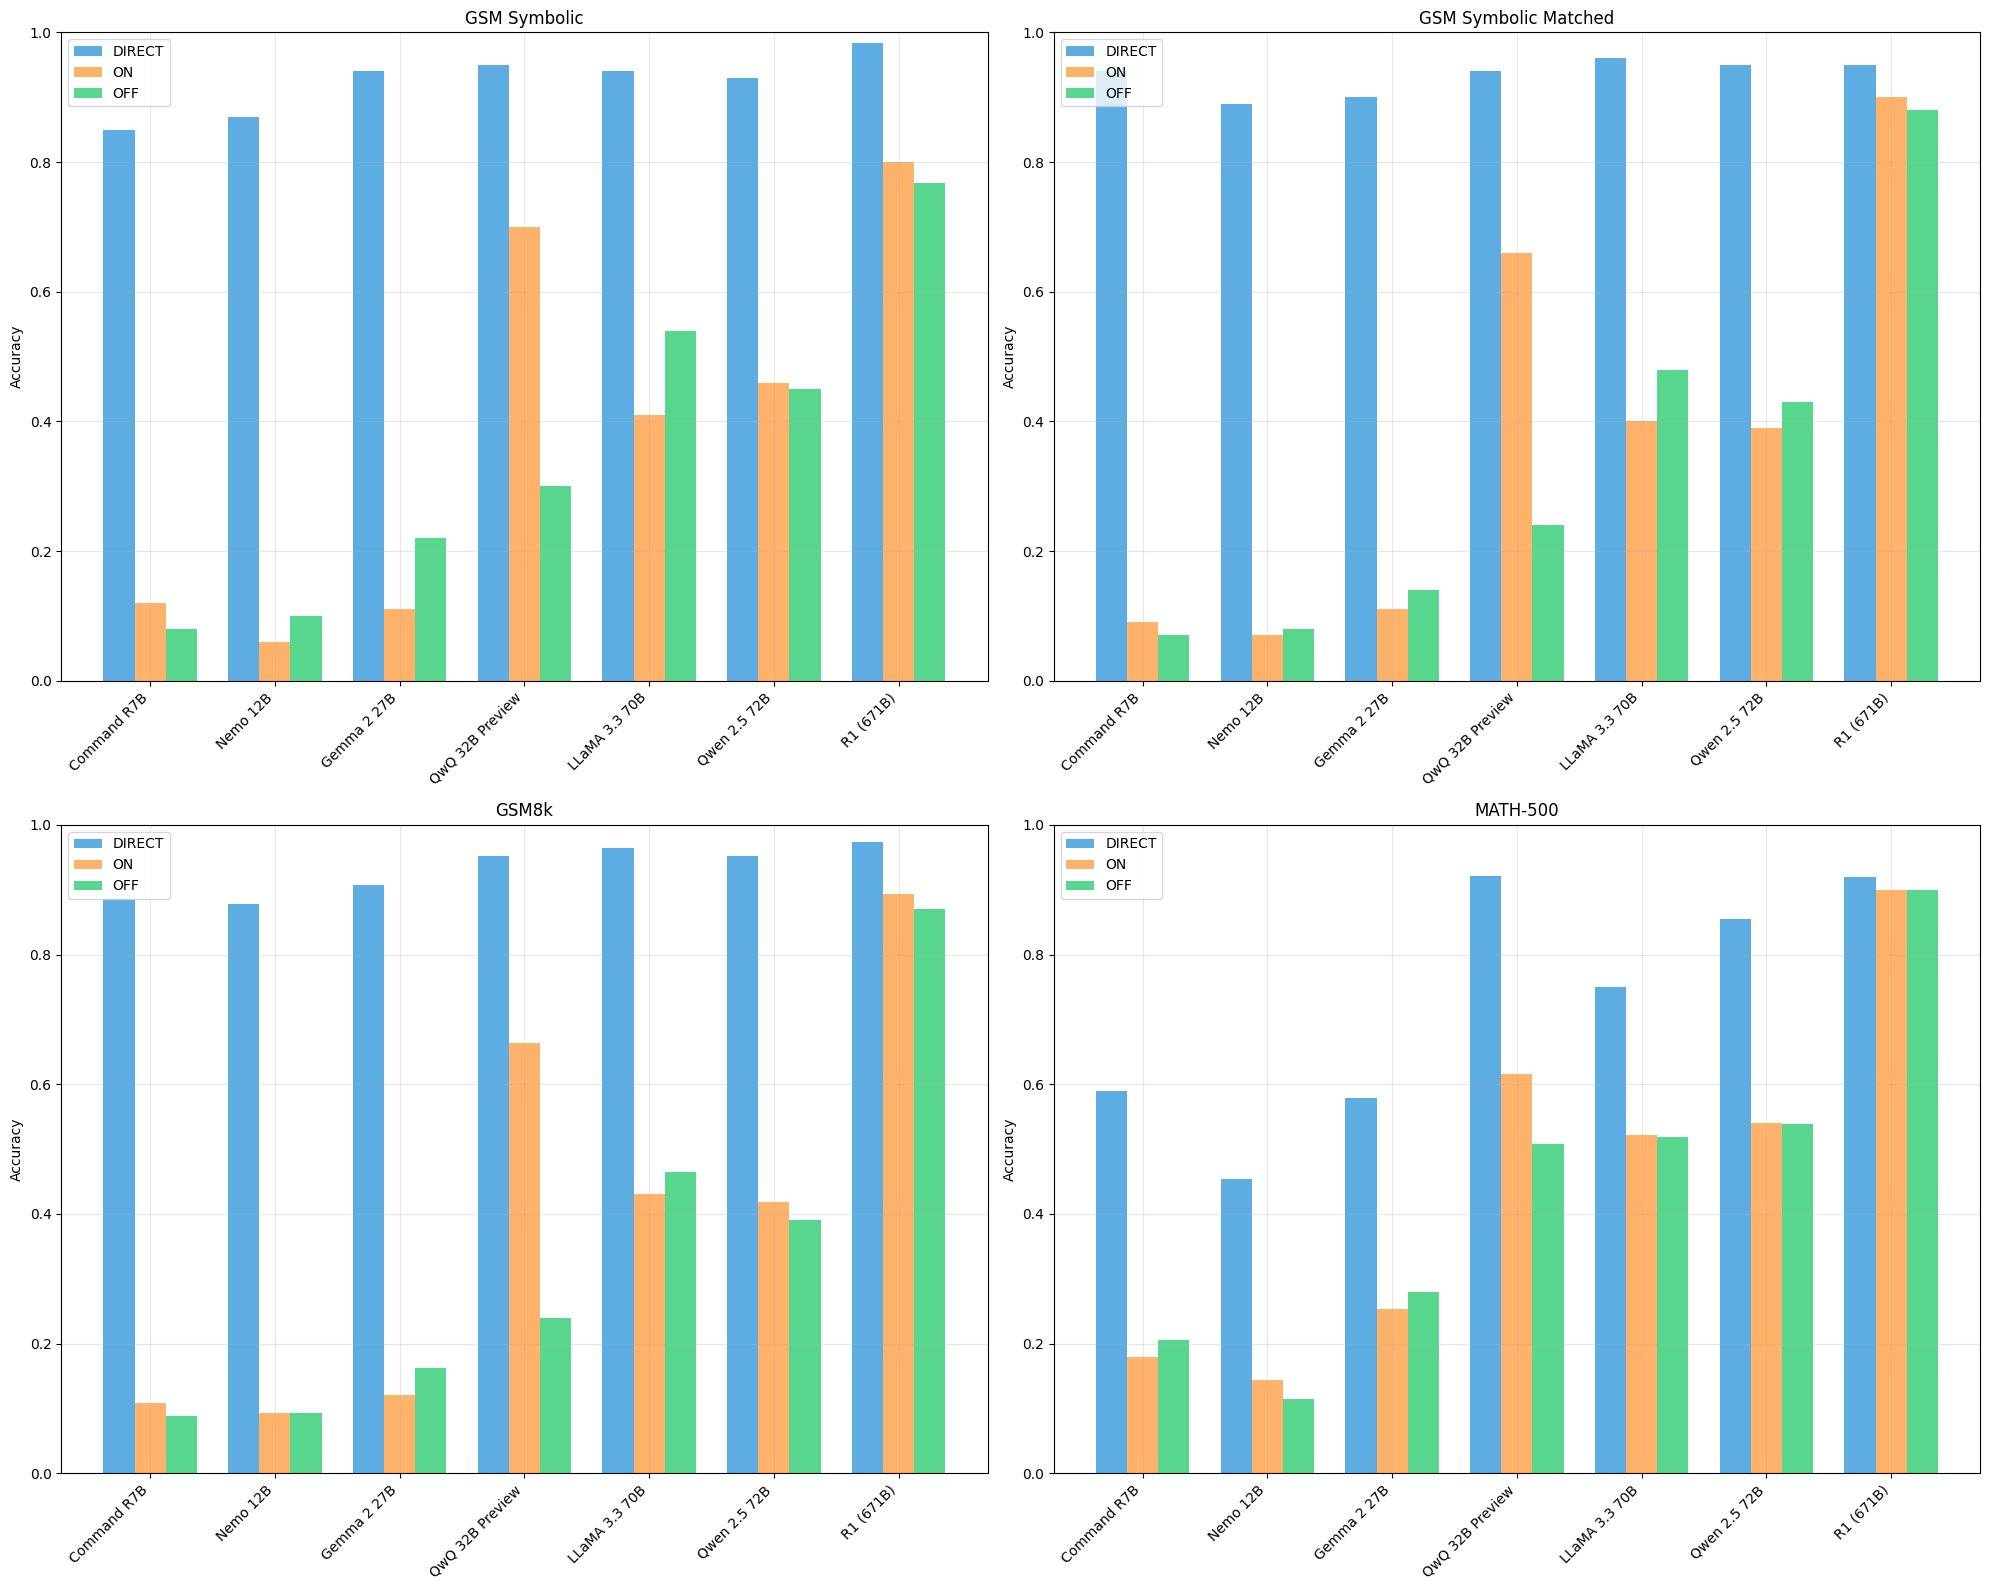

In [35]:
# Create the visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

# Colors for the three scenarios
colors = ['#3498db', '#ff9f43', '#2ecc71']
bar_width = 0.25

datasets = ['gsm_symbolic', 'gsm_symbolic_matched', 'gsm8k', 'math']
scenarios = ['direct', 'on', 'off']

models = [
    'command-r7b-12-2024',
    'mistralai/mistral-nemo',
    'google/gemma-2-27b-it',
    'qwen/qwq-32b-preview',
    'meta-llama/llama-3.3-70b-instruct',
    'qwen/qwen-2.5-72b-instruct',
    'R1 (671B)'   # <-- new model added
]
display_names = [
    "Command R7B",
    "Nemo 12B",
    "Gemma 2 27B",
    "QwQ 32B Preview",
    "LLaMA 3.3 70B",
    "Qwen 2.5 72B",
    "R1 (671B)"
]

# Provided R1 results as percentages converted to fractions
r1_results = {
    'gsm8k': {'direct': 97.4/100, 'on': 89.3/100, 'off': 87.0/100},
    'gsm_symbolic': {'direct': 98.4/100, 'on': 80.0/100, 'off': 76.8/100},
    'gsm_symbolic_matched': {'direct': 95.0/100, 'on': 90.0/100, 'off': 88.0/100},
    'math': {'direct': 91.9/100, 'on': 90.0/100, 'off': 90.0/100},
}

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    x = np.arange(len(models))
    
    # Plot bars for each scenario
    for i, (scenario, color) in enumerate(zip(scenarios, colors)):
        values = []
        for model in models:
            if model == 'R1 (671B)':
                # Use the provided R1 results
                values.append(r1_results[dataset][scenario])
            else:
                # Use the existing lookup value for other models
                values.append(lookup[dataset][scenario][model])
        ax.bar(x + i * bar_width, values, bar_width, label=scenario.upper(), color=color, alpha=0.8)
    
    # Customize the plot
    ax.set_ylabel('Accuracy')
    title_lookup = {
        "gsm_symbolic": "GSM Symbolic",
        "gsm_symbolic_matched": "GSM Symbolic Matched",
        "gsm8k": "GSM8k",
        "math": "MATH-500"
    }
    ax.set_title(f'{title_lookup[dataset]}')
    ax.set_xticks(x + bar_width)
    # ax.set_xticklabels([m.split('/')[-1] if '/' in m else m for m in models], rotation=45, ha='right')
    ax.set_xticklabels(display_names, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.0)

plt.tight_layout()
plt.savefig("four-way-comparison.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.savefig("four-way-comparison.svg", format="svg", bbox_inches="tight")
plt.show()

['command-r7b-12-2024', 'mistralai/mistral-nemo', 'google/gemma-2-27b-it', 'qwen/qwq-32b-preview', 'meta-llama/llama-3.3-70b-instruct', 'qwen/qwen-2.5-72b-instruct']


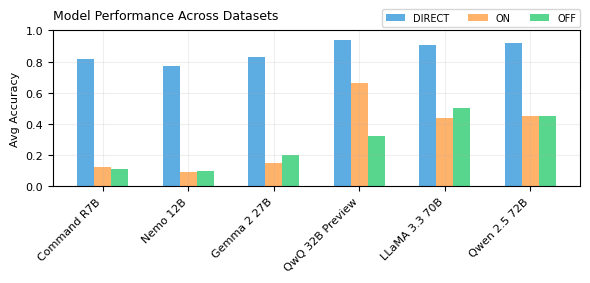

In [10]:
# THIS IS FOR THE AVERAGED, COMPACT
# Create single figure with smaller dimensions
fig, ax = plt.subplots(figsize=(6, 3))

# Colors for the three scenarios
colors = ['#3498db', '#ff9f43', '#2ecc71']
bar_width = 0.2

scenarios = ['direct', 'on', 'off']
datasets = ['gsm_symbolic', 'gsm_symbolic_matched', 'gsm8k', 'math']

# Shorter display names
model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Preview',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
]

print(models)

x = np.arange(len(models))

# Calculate and plot averages
for i, scenario in enumerate(scenarios):
    averages = []
    for model in models:
        performances = [lookup[dataset][scenario][model] for dataset in datasets]
        avg_performance = np.mean(performances)
        averages.append(avg_performance)
    
    ax.bar(x + i*bar_width, averages, bar_width, 
           label=scenario.upper(), color=colors[i], alpha=0.8)

# Customize the plot
ax.set_ylabel('Avg Accuracy', fontsize=8)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(model_display_names, 
                   rotation=45, ha='right', fontsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.grid(True, alpha=0.2)
ax.set_ylim(0, 1.0)

# Combine title and legend on same line
ax.set_title('Model Performance Across Datasets', fontsize=9, loc='left', pad=8)
legend = ax.legend(fontsize=7, ncol=3, bbox_to_anchor=(1.0, 1.08), 
                  loc='right', borderaxespad=0.)

plt.tight_layout()
plt.show()

['command-r7b-12-2024', 'mistralai/mistral-nemo', 'google/gemma-2-27b-it', 'qwen/qwq-32b-preview', 'meta-llama/llama-3.3-70b-instruct', 'qwen/qwen-2.5-72b-instruct']


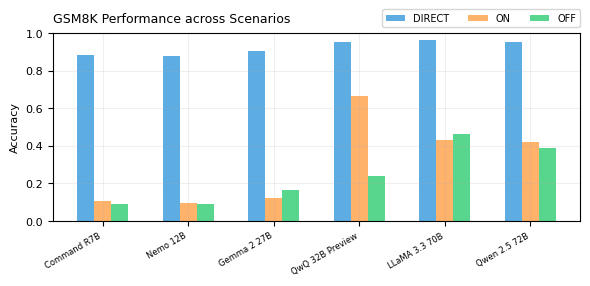

In [11]:
# GSM8K RESULTS ONLY, COMPACT
# Create single figure with smaller dimensions
fig, ax = plt.subplots(figsize=(6, 3))

# Colors for the three scenarios
colors = ['#3498db', '#ff9f43', '#2ecc71']
bar_width = 0.2

scenarios = ['direct', 'on', 'off']

# Shorter display names
model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Preview',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
]
print(models)

x = np.arange(len(models))

# Plot bars for each scenario - now just using GSM8K data
for i, scenario in enumerate(scenarios):
    values = [lookup['gsm8k'][scenario][model] for model in models]
    ax.bar(x + i*bar_width, values, bar_width, 
           label=scenario.upper(), color=colors[i], alpha=0.8)

# Customize the plot
ax.set_ylabel('Accuracy', fontsize=8)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(model_display_names, 
                   rotation=30, ha='right', fontsize=6)  # Changed rotation to 30 and fontsize to 6
ax.tick_params(axis='y', labelsize=8)
ax.grid(True, alpha=0.2)
ax.set_ylim(0, 1.0)

# Combine title and legend on same line
ax.set_title('GSM8K Performance across Scenarios', fontsize=9, loc='left', pad=8)
legend = ax.legend(fontsize=7, ncol=3, bbox_to_anchor=(1.0, 1.08), 
                  loc='right', borderaxespad=0.)

plt.tight_layout()
plt.show()

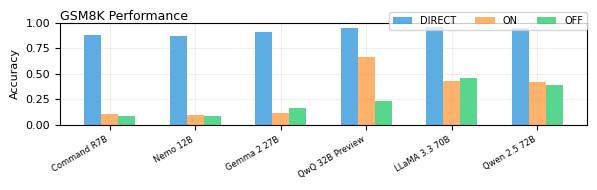

In [12]:
# Create single figure with smaller dimensions
fig, ax = plt.subplots(figsize=(6, 2))  # Changed from 3 to 2

# Colors for the three scenarios
colors = ['#3498db', '#ff9f43', '#2ecc71']
bar_width = 0.2

scenarios = ['direct', 'on', 'off']

model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Preview',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
]

x = np.arange(len(models))

# Plot bars for each scenario - now just using GSM8K data
for i, scenario in enumerate(scenarios):
    values = [lookup['gsm8k'][scenario][model] for model in models]
    ax.bar(x + i*bar_width, values, bar_width, 
           label=scenario.upper(), color=colors[i], alpha=0.8)

# Customize the plot
ax.set_ylabel('Accuracy', fontsize=8)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(model_display_names, 
                   rotation=30, ha='right', fontsize=6)
ax.tick_params(axis='y', labelsize=8)
ax.grid(True, alpha=0.2)
ax.set_ylim(0, 1.0)

# Combine title and legend on same line
ax.set_title('GSM8K Performance', fontsize=9, loc='left', pad=2)  # Changed from pad=8 to pad=2
legend = ax.legend(fontsize=7, ncol=3, bbox_to_anchor=(1.0, 1.02),  # Changed from 1.08 to 1.02
                  loc='right', borderaxespad=0.)

plt.tight_layout()
plt.show()

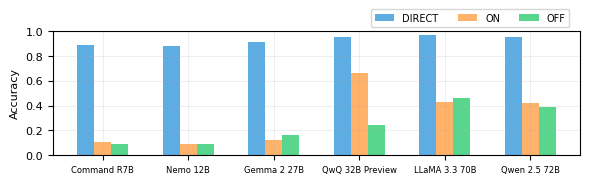

In [13]:
# Create single figure with smaller dimensions but wider to accommodate horizontal labels
fig, ax = plt.subplots(figsize=(6, 2))  # Made wider (6 -> 8)

# Colors for the three scenarios
colors = ['#3498db', '#ff9f43', '#2ecc71']
bar_width = 0.2

scenarios = ['direct', 'on', 'off']

model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Preview',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
]

x = np.arange(len(models))

# Plot bars for each scenario - now just using GSM8K data
for i, scenario in enumerate(scenarios):
    values = [lookup['gsm8k'][scenario][model] for model in models]
    ax.bar(x + i*bar_width, values, bar_width, 
           label=scenario.upper(), color=colors[i], alpha=0.8)

# Customize the plot
ax.set_ylabel('Accuracy', fontsize=8)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(model_display_names, 
                   rotation=0, ha='center', fontsize=6)  # Changed rotation to 0 and ha to center
ax.tick_params(axis='y', labelsize=8)
ax.grid(True, alpha=0.2)
ax.set_ylim(0, 1.0)

# Adjusted title and legend positioning
# ax.set_title('GSM8K Performance', fontsize=9, loc='left', pad=2)
legend = ax.legend(fontsize=7, ncol=3, 
                  bbox_to_anchor=(0.98, 1.175),
                  loc='upper right', 
                  borderaxespad=0.)

plt.tight_layout()
plt.show()

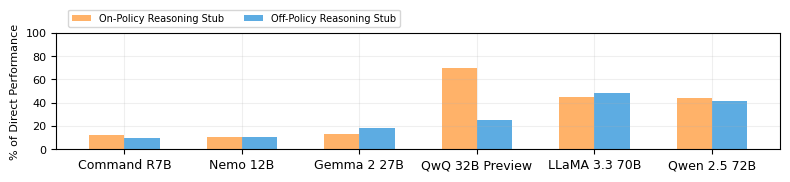

In [14]:
# Create single figure with smaller dimensions but wider to accommodate horizontal labels
fig, ax = plt.subplots(figsize=(8, 2))

# Colors for the scenarios
colors = ['#ff9f43', '#3498db']
bar_width = 0.3

scenarios = ['on', 'off']
scenario_labels = ['On-Policy Reasoning Stub', 'Off-Policy Reasoning Stub']  # New descriptive labels

model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Preview',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
]

x = np.arange(len(models))

# Plot bars for each scenario as percentage of direct
for i, (scenario, label) in enumerate(zip(scenarios, scenario_labels)):
    relative_values = []
    for model in models:
        direct_value = lookup['gsm8k']['direct'][model]
        scenario_value = lookup['gsm8k'][scenario][model]
        relative_value = (scenario_value / direct_value) * 100
        relative_values.append(relative_value)
    
    ax.bar(x + i*bar_width, relative_values, bar_width, 
           label=label, color=colors[i], alpha=0.8)

# Customize the plot
ax.set_ylabel('% of Direct Performance', fontsize=8)
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(model_display_names, 
                   rotation=0, ha='center', fontsize=9)  # Increased fontsize from 6 to 8
ax.tick_params(axis='y', labelsize=8)
ax.grid(True, alpha=0.2)
ax.set_ylim(0, 100)

# Adjusted title and legend positioning
# ax.set_title('GSM8K Relative Performance', fontsize=9, loc='left', pad=2)
legend = ax.legend(fontsize=7, ncol=2,
                  bbox_to_anchor=(0.475, 1.2),
                  loc='upper right', 
                  borderaxespad=0.)

plt.tight_layout()

plt.savefig('gsm8k_relative_performance.pdf', 
            format='pdf', 
            bbox_inches='tight',  # This ensures the legend isn't cut off
            dpi=300)  # Higher DPI for better quality

plt.savefig('gsm8k_relative_performance.svg', 
            format='svg', 
            bbox_inches='tight')
            
plt.show()

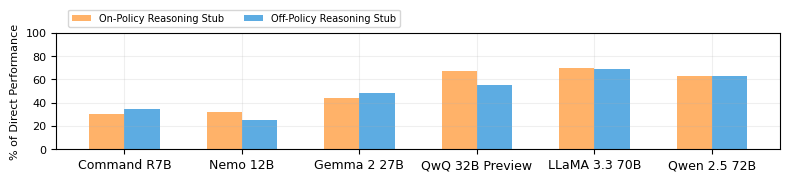

In [15]:
# Same as above but for MATH
# Create single figure with smaller dimensions but wider to accommodate horizontal labels
fig, ax = plt.subplots(figsize=(8, 2))

# Colors for the scenarios
colors = ['#ff9f43', '#3498db']
bar_width = 0.3

scenarios = ['on', 'off']
scenario_labels = ['On-Policy Reasoning Stub', 'Off-Policy Reasoning Stub']

model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Preview',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
]

x = np.arange(len(models))

# Plot bars for each scenario as percentage of direct - now using 'math' instead of 'gsm8k'
for i, (scenario, label) in enumerate(zip(scenarios, scenario_labels)):
    relative_values = []
    for model in models:
        direct_value = lookup['math']['direct'][model]
        scenario_value = lookup['math'][scenario][model]
        relative_value = (scenario_value / direct_value) * 100
        relative_values.append(relative_value)
    
    ax.bar(x + i*bar_width, relative_values, bar_width, 
           label=label, color=colors[i], alpha=0.8)

# Customize the plot
ax.set_ylabel('% of Direct Performance', fontsize=8)
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(model_display_names, 
                   rotation=0, ha='center', fontsize=9)
ax.tick_params(axis='y', labelsize=8)
ax.grid(True, alpha=0.2)
ax.set_ylim(0, 100)

legend = ax.legend(fontsize=7, ncol=2,
                  bbox_to_anchor=(0.475, 1.2),
                  loc='upper right', 
                  borderaxespad=0.)

plt.tight_layout()

plt.savefig('math_relative_performance.pdf', 
            format='pdf', 
            bbox_inches='tight',
            dpi=300)

plt.savefig('math_relative_performance.svg', 
            format='svg', 
            bbox_inches='tight')
            
plt.show()

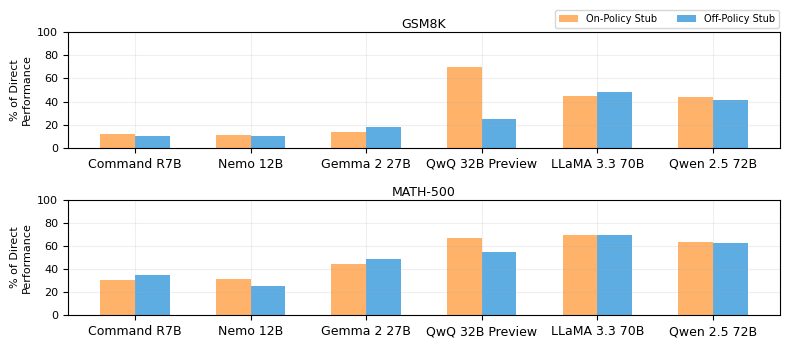

In [16]:
# Create a figure with two stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3.5), height_ratios=[1, 1])

# Colors for the scenarios
colors = ['#ff9f43', '#3498db']
bar_width = 0.3

scenarios = ['on', 'off']
scenario_labels = ['On-Policy Stub', 'Off-Policy Stub']

model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Preview',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
]

x = np.arange(len(models))

# Function to create bars for a dataset
def plot_dataset_bars(ax, dataset_key, title):
    bars = []  # Store bar objects for legend
    for i, (scenario, label) in enumerate(zip(scenarios, scenario_labels)):
        relative_values = []
        for model in models:
            direct_value = lookup[dataset_key]['direct'][model]
            scenario_value = lookup[dataset_key][scenario][model]
            relative_value = (scenario_value / direct_value) * 100
            relative_values.append(relative_value)
        
        bar = ax.bar(x + i*bar_width, relative_values, bar_width, 
                    color=colors[i], alpha=0.8)
        bars.append(bar)
    
    # Customize each subplot
    ax.set_ylabel('% of Direct\nPerformance', fontsize=8)
    ax.set_xticks(x + bar_width/2)
    ax.set_xticklabels(model_display_names, 
                       rotation=0, ha='center', fontsize=9)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True, alpha=0.2)
    ax.set_ylim(0, 100)
    ax.set_title(title, fontsize=9, pad=3)  # Simple centered title
    
    return bars

# Create both plots
bars1 = plot_dataset_bars(ax1, 'gsm8k', 'GSM8K')
bars2 = plot_dataset_bars(ax2, 'math', 'MATH-500')

# Add a single legend at the top of the figure using the bars from the first plot
legend = fig.legend(bars1, scenario_labels,
                   fontsize=7, ncol=2,
                   bbox_to_anchor=(0.98, .98),
                   loc='upper right', 
                   borderaxespad=0.)

# Adjust spacing between subplotMATs
plt.subplots_adjust(hspace=0.4)

plt.tight_layout()

plt.savefig('combined_relative_performance.pdf', 
            format='pdf', 
            bbox_inches='tight',
            dpi=300)

plt.savefig('combined_relative_performance.svg', 
            format='svg', 
            bbox_inches='tight')
            
plt.show()

# Sam trying to shove R1 into the results below

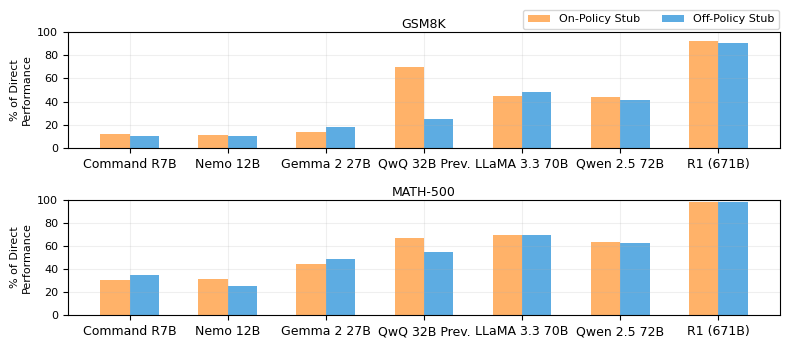

In [26]:
# Create a figure with two stacked subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3.5), height_ratios=[1, 1])

# Colors for the two scenarios (On-Policy and Off-Policy)
colors = ['#ff9f43', '#3498db']
bar_width = 0.3
scenarios = ['on', 'off']
scenario_labels = ['On-Policy Stub', 'Off-Policy Stub']

# Update the list of models to include the new "R1 (671B)"
models = [
    'command-r7b-12-2024',
    'mistralai/mistral-nemo',
    'google/gemma-2-27b-it',
    'qwen/qwq-32b-preview',
    'meta-llama/llama-3.3-70b-instruct',
    'qwen/qwen-2.5-72b-instruct',
    'R1 (671B)'  # <-- new model
]

model_display_names = [
    'Command R7B',
    'Nemo 12B',
    'Gemma 2 27B',
    'QwQ 32B Prev.',
    'LLaMA 3.3 70B',
    'Qwen 2.5 72B',
    'R1 (671B)'  # <-- new model display name
]

x = np.arange(len(models))

def plot_dataset_bars(ax, dataset_key, title):
    bars = []  # For storing bar objects for the legend
    for i, (scenario, label) in enumerate(zip(scenarios, scenario_labels)):
        relative_values = []
        for model in models:
            if model == 'R1 (671B)':
                # Inject the provided percentages for the R1 (671B) model
                if dataset_key == 'gsm8k':
                    if scenario == 'on':
                        relative_value = 92.63
                    elif scenario == 'off':
                        relative_value = 90.25
                elif dataset_key == 'math':
                    # For math, both on- and off-policy are identical
                    relative_value = 97.93
            else:
                # For all other models, use the lookup dictionary to compute the percentage
                direct_value = lookup[dataset_key]['direct'][model]
                scenario_value = lookup[dataset_key][scenario][model]
                relative_value = (scenario_value / direct_value) * 100
            relative_values.append(relative_value)
        
        bar = ax.bar(x + i * bar_width, relative_values, bar_width, 
                     color=colors[i], alpha=0.8)
        bars.append(bar)
    
    # Customize each subplot for clarity
    ax.set_ylabel('% of Direct\nPerformance', fontsize=8)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(model_display_names, rotation=0, ha='center', fontsize=9)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True, alpha=0.2)
    ax.set_ylim(0, 100)
    ax.set_title(title, fontsize=9, pad=3)
    
    return bars

# Create the plots for GSM8K and MATH-500
bars1 = plot_dataset_bars(ax1, 'gsm8k', 'GSM8K')
bars2 = plot_dataset_bars(ax2, 'math', 'MATH-500')

# Add a single legend at the top right of the figure with bold font
legend = fig.legend(bars1, scenario_labels, ncol=2,
                    bbox_to_anchor=(0.98, .98), loc='upper right', borderaxespad=0.,
                    prop={'size': 8})

plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.savefig('combined_relative_performance.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.savefig('combined_relative_performance.svg', format='svg', bbox_inches='tight')
plt.show()